# Unsupervised Learning - Wine Quality

Objectives:

1. Run a type of cluster analysis on the wine dataset, 
2. Determine an appropriate number of clusters.
3. Visualize and interpret the clusters
4. Run a type of dimensionality reduction approach on the wine dataset (PCA, e.g.).

Q1. How many factors are necessary to explain the data.

Q2. Determine a possible interpretation for the factors.

Q3. Compare the dimensionality reduction and the cluster analysis.

In [26]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score

In [27]:
# Read the data from the csv file
wine = pd.read_csv('winequality-red.csv', sep=';')

In [28]:
# Run the head() function to see the first 5 rows of the data
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
# Scale the data
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine)

# Run the head() function to see the first 5 rows of the data   
wine_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [30]:
# Run a cluster analysis with 3 clusters on the scaled data
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(wine_scaled)

# Add the cluster labels to the data
wine['cluster'] = kmeans.labels_

# Run the head() function to see the first 5 rows of the data
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [31]:
# Calculate the cluster proportions and centers
cluster_prop = wine.groupby('cluster').size() / wine.shape[0]
cluster_centers = wine.groupby('cluster').mean()

# Print the cluster proportions and centers
print(cluster_prop)
print(cluster_centers)

cluster
0    0.439024
1    0.315822
2    0.245153
dtype: float64
         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0             7.194160          0.616987     0.118875        2.216168   
1             9.970693          0.396911     0.467307        2.591386   
2             8.208163          0.536786     0.290434        3.048852   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0         0.079362            13.143162             34.227920  0.995940   
1         0.098838            11.354455             31.120792  0.997434   
2         0.087332            26.590561             88.158163  0.997306   

               pH  sulphates    alcohol   quality  
cluster                                            
0        3.406838   0.603704  10.457123  5.507123  
1        3.198634   0.757743  10.8276

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


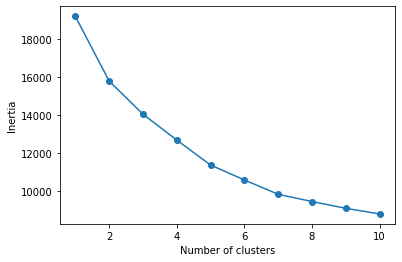

In [32]:
# Determine the number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(wine_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show();

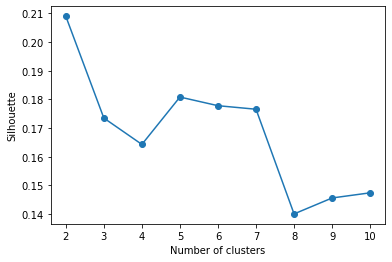

In [33]:
# Determine the number of clusters using the silhouette method
silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(wine_scaled)
    silhouette.append(silhouette_score(wine_scaled, kmeans.labels_))

# Plot the silhouette values
plt.plot(range(2, 11), silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show();

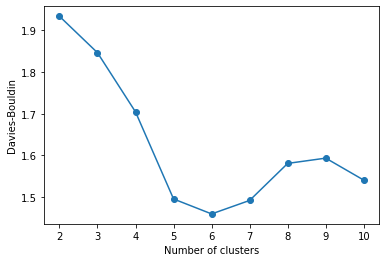

In [34]:
# Determine the number of clusters using the Davies-Bouldin method
db = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(wine_scaled)
    db.append(davies_bouldin_score(wine_scaled, kmeans.labels_))

# Plot the Davies-Bouldin values
plt.plot(range(2, 11), db, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin')
plt.show();

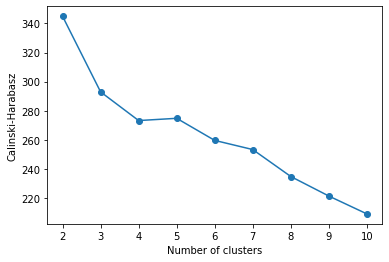

In [35]:
# Determine the number of clusters using the Calinski-Harabasz method
ch = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(wine_scaled)
    ch.append(calinski_harabasz_score(wine_scaled, kmeans.labels_))

# Plot the Calinski-Harabasz values
plt.plot(range(2, 11), ch, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz')
plt.show();

In [36]:
# Based on the methods above, select the number of clusters
k = 7

# Run a cluster analysis with the selected number of clusters on the scaled data
kmeans = KMeans(n_clusters=k, random_state=123)
kmeans.fit(wine_scaled)

# Add the cluster labels to the data
wine['cluster'] = kmeans.labels_

# Run the head() function to see the first 5 rows of the data
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [37]:
# Calculate the cluster proportions and centers
cluster_prop = wine.groupby('cluster').size() / wine.shape[0]
cluster_centers = wine.groupby('cluster').mean()

# Print the cluster proportions and centers
print(cluster_prop)
print(cluster_centers)

cluster
0    0.303315
1    0.125704
2    0.163227
3    0.021263
4    0.210757
5    0.157598
6    0.018136
dtype: float64
         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0             7.577113          0.648629     0.118247        2.263608   
1             6.447264          0.591493     0.091144        2.150249   
2             8.647893          0.348103     0.410345        2.382375   
3             8.170588          0.521618     0.351765        9.532353   
4             8.106231          0.532359     0.282255        2.507715   
5            11.191270          0.425060     0.512381        2.703175   
6             8.462069          0.531034     0.493793        1.975862   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0         0.085305            10.815464             33.035052  0.996774

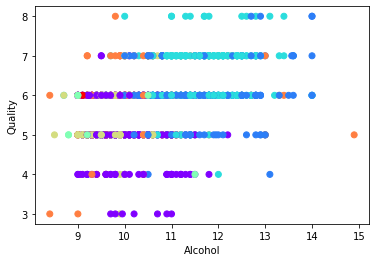

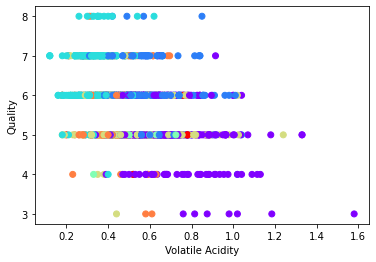

In [38]:
#  Visualize and interpret the clusters
# Create a scatter plot of the clusters
plt.scatter(wine['alcohol'], wine['quality'], c=wine['cluster'], cmap='rainbow')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show();

# Create a scatter plot of the clusters
plt.scatter(wine['volatile acidity'], wine['quality'], c=wine['cluster'], cmap='rainbow')
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.show();

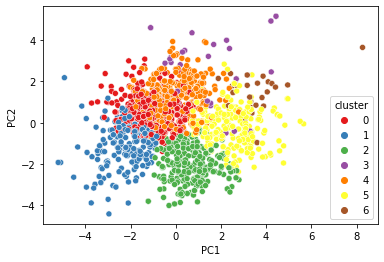

In [39]:
# Plot the clusters using the first two principal components of the data
pca = PCA(n_components=2, random_state=123)
wine_pca = pca.fit_transform(wine_scaled)
wine_pca = pd.DataFrame(wine_pca, columns=['PC1', 'PC2'])
wine_pca['cluster'] = wine['cluster']

# Plot the clusters
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=wine_pca, palette='Set1')
plt.show();

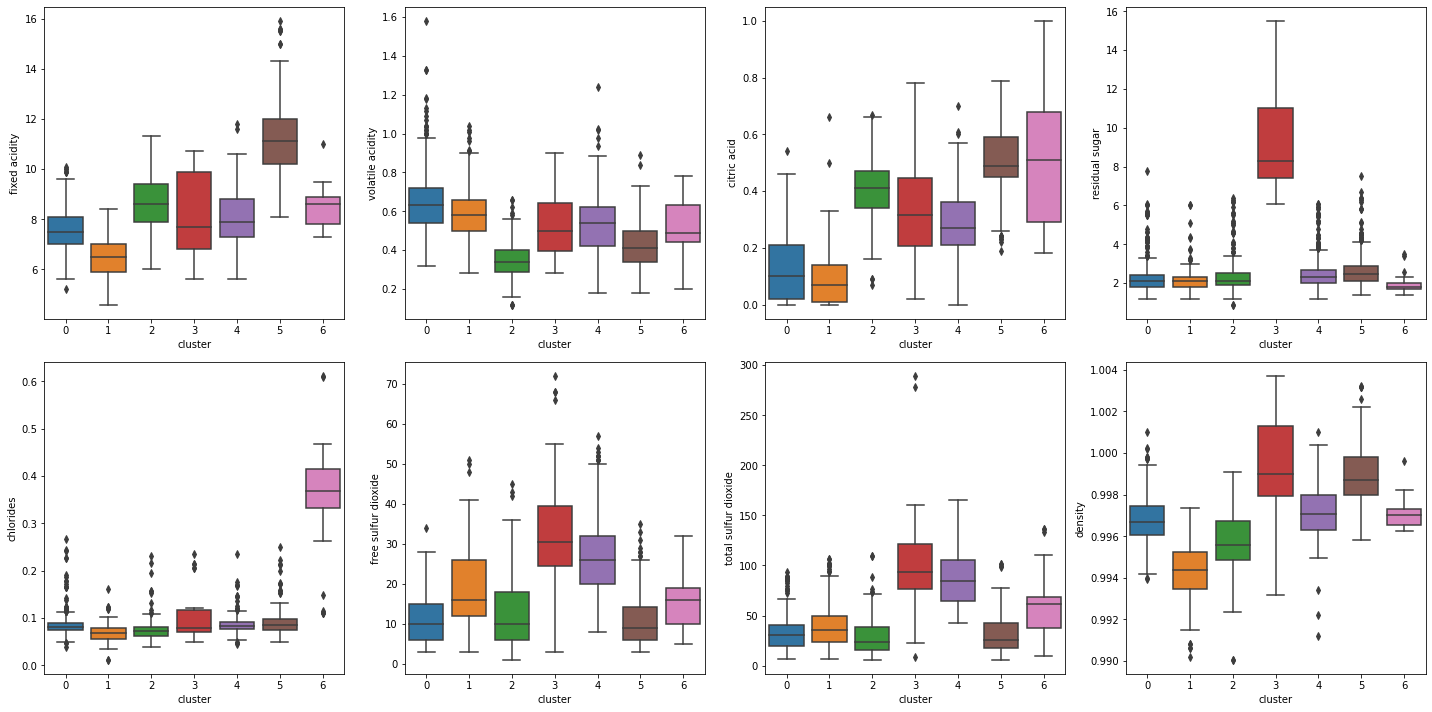

In [40]:
# Plot the clusters on a big plot, that is easy to understand
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x='cluster', y=wine.columns[i], data=wine, ax=ax)
plt.tight_layout()
plt.show();

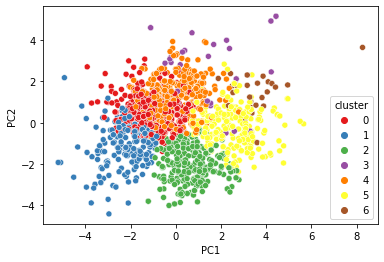

In [41]:
# Run a PCA of dimensionality reduction approach on the wine dataset (PCA, e.g.).
# Use the first two principal components to visualize the clusters.
pca = PCA(n_components=2, random_state=123)
wine_pca = pca.fit_transform(wine_scaled)
wine_pca = pd.DataFrame(wine_pca, columns=['PC1', 'PC2'])
wine_pca['cluster'] = wine['cluster']

# Plot the clusters
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=wine_pca, palette='Set1')
plt.show();

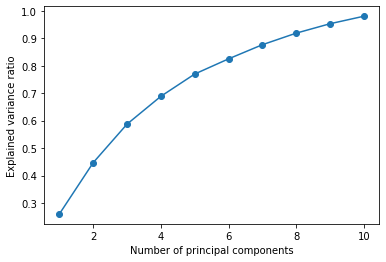

In [42]:
# Optimize the number of principal components using the elbow method
inertia = []
for k in range(1, 11):
    pca = PCA(n_components=k, random_state=123)
    pca.fit(wine_scaled)
    inertia.append(pca.explained_variance_ratio_.sum())

# Plot the inertia values
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance ratio')
plt.show();

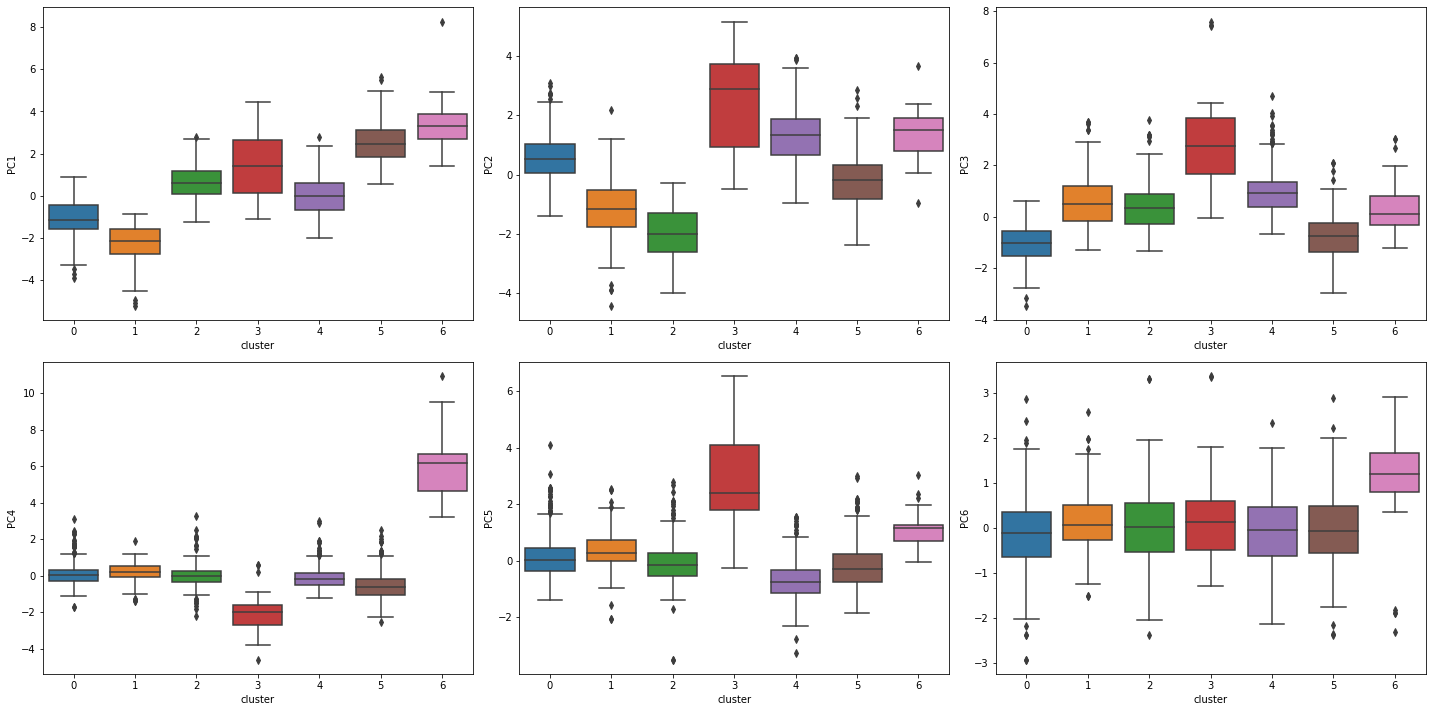

In [43]:
# Select the number of principal components
k = 6

# Run a PCA of dimensionality reduction approach on the wine dataset (PCA, e.g.).
# Use the first two principal components to visualize the clusters.
pca = PCA(n_components=k, random_state=123)
wine_pca = pca.fit_transform(wine_scaled)
wine_pca = pd.DataFrame(wine_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
wine_pca['cluster'] = wine['cluster']

# Plot the PCA components
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x='cluster', y=wine_pca.columns[i], data=wine_pca, ax=ax)
plt.tight_layout()
plt.show();

Q1. How many factors are necessary to explain the data.

Optimal based on the elbow method is 6.

Q2. Determine a possible interpretation for the factors.

Q3. Compare the dimensionality reduction and the cluster analysis.

Data was cluster on 6 groups, with also 6 principal components. Reducing the dimensionality of the data, from 11 independent variables to 6 principal components.